# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

> # # ****Based upon data of employees of a bank we calculate whether a employee have a chance to stay in the company or not.****

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data=dataset.iloc[:,[3,4,7,8,9,10,11,12,13]]
data

,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,83807.86,1,0,1,112542.58,0
2,502,France,8,159660.80,3,1,0,113931.57,1
3,699,France,1,0.00,2,0,0,93826.63,0
4,850,Spain,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,France,5,0.00,2,1,0,96270.64,0
9996,516,France,10,57369.61,1,1,1,101699.77,0
9997,709,France,7,0.00,1,0,1,42085.58,1
9998,772,Germany,3,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 703.2+ KB


In [5]:
data['Exited'].unique()

array([1, 0], dtype=int64)

In [6]:
#***Here we found a one featured column in string format so we need to encode this ,so now we are using a category encoder method***

In [7]:
pd.options.mode.chained_assignment = None

#SettingWithCopyWarning: 
#A value is trying to be set on a copy of a slice from a DataFrame.

 #I got the above error(warning) while doing a Label Encoding ,so to solve this i used a above code

In [8]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [9]:
import category_encoders as ce
target_encoder=ce.TargetEncoder()
data['Geography']=target_encoder.fit_transform(data['Geography'],data['Exited'])

In [10]:
data

,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.161548,2,0.00,1,1,1,101348.88,1
1,608,0.166734,1,83807.86,1,0,1,112542.58,0
2,502,0.161548,8,159660.80,3,1,0,113931.57,1
3,699,0.161548,1,0.00,2,0,0,93826.63,0
4,850,0.166734,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,0.161548,5,0.00,2,1,0,96270.64,0
9996,516,0.161548,10,57369.61,1,1,1,101699.77,0
9997,709,0.161548,7,0.00,1,0,1,42085.58,1
9998,772,0.324432,3,75075.31,2,1,0,92888.52,1


In [11]:
#Now we check the data is balanced or not 

In [12]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
#Here we found the data is imbalanced so we need to balance the data with the help of balancing technique

In [14]:
#Before balancing we need to split the data in two two sets one is dependemt(y), and one is independent(x)

In [15]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [19]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [18]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [20]:
from collections import Counter
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


In [21]:
#we see in above code, our data is completely balanced

In [22]:
#To make our model more strong and our dataset more better we need to do a feature scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x_data)
x_scaled

array([[0.538     , 0.        , 0.2       , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 0.03184029, 0.1       , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.8       , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.48939   , 0.0059115 , 0.5       , ..., 1.        , 0.        ,
        0.41486586],
       [0.61402896, 0.01673746, 0.2       , ..., 0.52566914, 1.        ,
        0.86418935],
       [0.54561317, 0.00484811, 0.1065844 , ..., 0.        , 0.15226343,
        0.30313701]])

In [24]:
#Now we need to split the dataset into training set and testing set

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.25,random_state=30)

***Now we move towards our main goal i.e ANN model building*** 

# Part 1: ANN Model Initializing and model Building

In [26]:
ann=tf.keras.models.Sequential()
ann

In [27]:
#Hidden Layers 
ann.add(tf.keras.layers.Dense(units=8,activation='relu')) #this is 1st hidden layer and input layer also
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
#Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Part 2: Compiling and ANN Model Training on training set 

In [28]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
ann.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
374/374 [==============================] - 4s 3ms/step - loss: 0.6730 - accuracy: 0.5900
Epoch 2/50
374/374 [==============================] - 1s 3ms/step - loss: 0.6360 - accuracy: 0.6420
Epoch 3/50
374/374 [==============================] - 1s 3ms/step - loss: 0.5937 - accuracy: 0.6913
Epoch 4/50
374/374 [==============================] - 1s 4ms/step - loss: 0.5581 - accuracy: 0.7219
Epoch 5/50
374/374 [==============================] - 1s 4ms/step - loss: 0.5370 - accuracy: 0.7388
Epoch 6/50
374/374 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.7434
Epoch 7/50
374/374 [==============================] - 2s 5ms/step - loss: 0.4909 - accuracy: 0.7503
Epoch 8/50
374/374 [==============================] - 1s 4ms/step - loss: 0.4737 - accuracy: 0.7639
Epoch 9/50
374/374 [==============================] - 1s 3ms/step - loss: 0.4655 - accuracy: 0.7657
Epoch 10/50
374/374 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7713

In [30]:
ann_pred=ann.predict(x_test)
ann_pred

125/125 [==============================] - 1s 2ms/step


array([[0.996781  ],
       [0.17561036],
       [0.12384738],
       ...,
       [0.9979368 ],
       [0.67014706],
       [0.12589963]], dtype=float32)

In [31]:
New_ann_pred=[]
for x in ann_pred:
    if x>=0.5:
        New_ann_pred.append(1)
    else:
        New_ann_pred.append(0)
print(New_ann_pred)

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 

In [32]:
#Now we check the final accuracy of model

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Final_score=accuracy_score(y_test,New_ann_pred)
Final_score*100

82.16976393771974

In [34]:
pd.DataFrame(np.c_[y_test,New_ann_pred],columns=["Actual_value","Predicted_Result"])

,Actual_value,Predicted_Result
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3977,1,0
3978,1,0
3979,1,1
3980,1,1


# ******This is our final expected outcome ******

**With the help of Confusion matrix we check the performance of our ANN model**

In [35]:
print(confusion_matrix(y_test,New_ann_pred))

[[1763  217]
 [ 493 1509]]


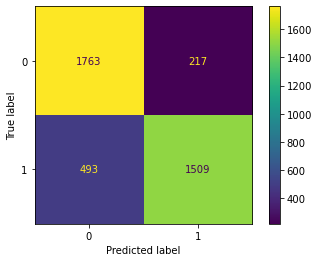

In [36]:
# confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
Confusion_Matrix=metrics.confusion_matrix(y_test,New_ann_pred)
cm_display=metrics.ConfusionMatrixDisplay(Confusion_Matrix)
cm_display.plot()
plt.show()


In [37]:
print(classification_report(y_test,New_ann_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1980
           1       0.87      0.75      0.81      2002

    accuracy                           0.82      3982
   macro avg       0.83      0.82      0.82      3982
weighted avg       0.83      0.82      0.82      3982



**From the above Final accuracy and  confusion matrix we say that performance of our model is good or our model performance is best**

# Visualisation

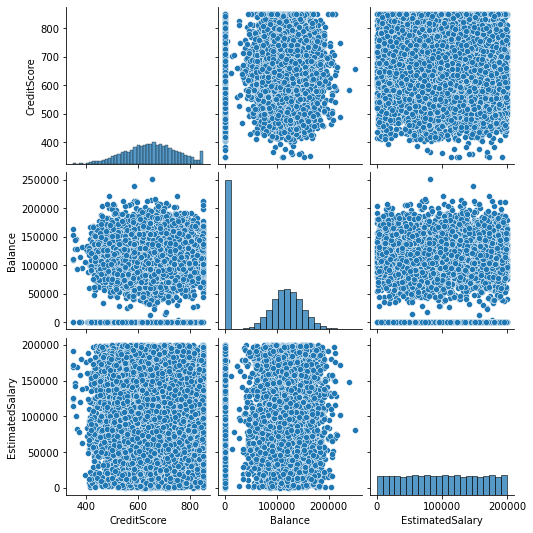

In [38]:
data1= data[['CreditScore', 'Balance', 'EstimatedSalary',]]
sns.pairplot(data1)
plt.show()

<AxesSubplot:xlabel='NumOfProducts', ylabel='EstimatedSalary'>

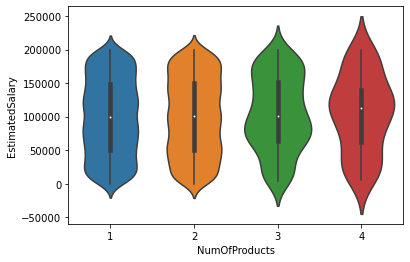

In [39]:

sns.violinplot(x='NumOfProducts', y='EstimatedSalary', data=data)

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>]], dtype=object)

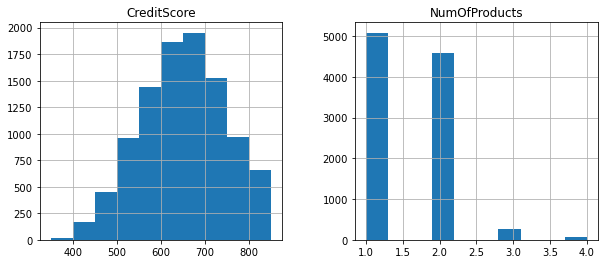

In [40]:
features = ['CreditScore', 'NumOfProducts']
data[features].hist(figsize=(10, 4))

# THANK YOU